<a href="https://colab.research.google.com/github/JacksonBopp/Personal-Repository/blob/main/Earthquake_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
# prompt: So I want to create a python script that will map earthquake data using ODEs, I want it to be able to map things such as tsunami propagation, earthquake magnitude, fault depth and location, displacement, earthquake damage, and any general earthquake dynamics such as elastic rebound and aftershock dynamics

# ##### Copyright 2024 Google LLC.
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
import matplotlib.pyplot as plt
# You'll likely need additional libraries for ODE solvers, mapping, and data handling.
# Example: import scipy.integrate as integrate

# Placeholder functions – Replace these with actual ODE models and data processing
def earthquake_model(t, y, magnitude, depth, location):
    """
    This is a placeholder for your ODE model of earthquake dynamics.
    It needs to be replaced with a proper model from seismology.

    Args:
      t: Time.
      y: State vector (e.g., displacement, velocity, acceleration).
      magnitude: Earthquake magnitude.
      depth: Fault depth.
      location: Fault location (latitude, longitude).

    Returns:
      dydt: Derivatives of the state vector.
    """
    # Example (replace with your actual ODE model):
    dydt = [0, 0]  # Replace with actual ODE equations
    return dydt

def tsunami_model(t, y, earthquake_params):
  """
    ODE model of tsunami propagation.
    Args:
      t: Time
      y: State vector
      earthquake_params: Parameters from earthquake model
  Returns:
    dydt: Derivatives of state vector
  """
  dydt = [0, 0] #Replace with actual ODEs
  return dydt

def map_earthquake_data(data):
  """Map earthquake data. Placeholder"""
  print("Mapping earthquake data (placeholder).")


# Sample data (replace with your actual data source)
earthquake_data = {
    "magnitude": 7.0,
    "depth": 10.0,
    "location": (34.05, -118.24),  # Example coordinates
    "displacement": 2, #Example displacement in meters
}

# Example usage
# ... Data loading and preprocessing ...

# Solve the ODEs
# ... (Use an ODE solver, e.g., from scipy.integrate) ...

# Example Plot (Replace this with your actual plotting logic)
# t = np.linspace(0, 10, 100)  # Time vector
# y = np.zeros((2,len(t)))
# plt.plot(t, y[0,:], label = "x")
# plt.legend()
# plt.xlabel("time")
# plt.ylabel("x value")
# plt.show()

map_earthquake_data(earthquake_data)

# ...Further processing and visualization (Mapping, etc.)...

Mapping earthquake data (placeholder).


Please enter the following parameters for the earthquake simulation:
Enter the magnitude of the earthquake (e.g., 6.9 for Taiwan earthquake): 6.9
Enter the depth of the earthquake (in km, e.g., 10 for Taiwan earthquake): 10
Enter latitude of the earthquake (e.g., 23.7 for Taiwan): 23.7
Enter longitude of the earthquake (e.g., 121.0 for Taiwan): 121.0
Enter the aftershock rate constant (alpha, typical value is around 0.1): 0.3
Enter the aftershock decay constant (beta, typical value is around 0.01): 0.01
Enter the time span for the simulation (e.g., 100 seconds): 30


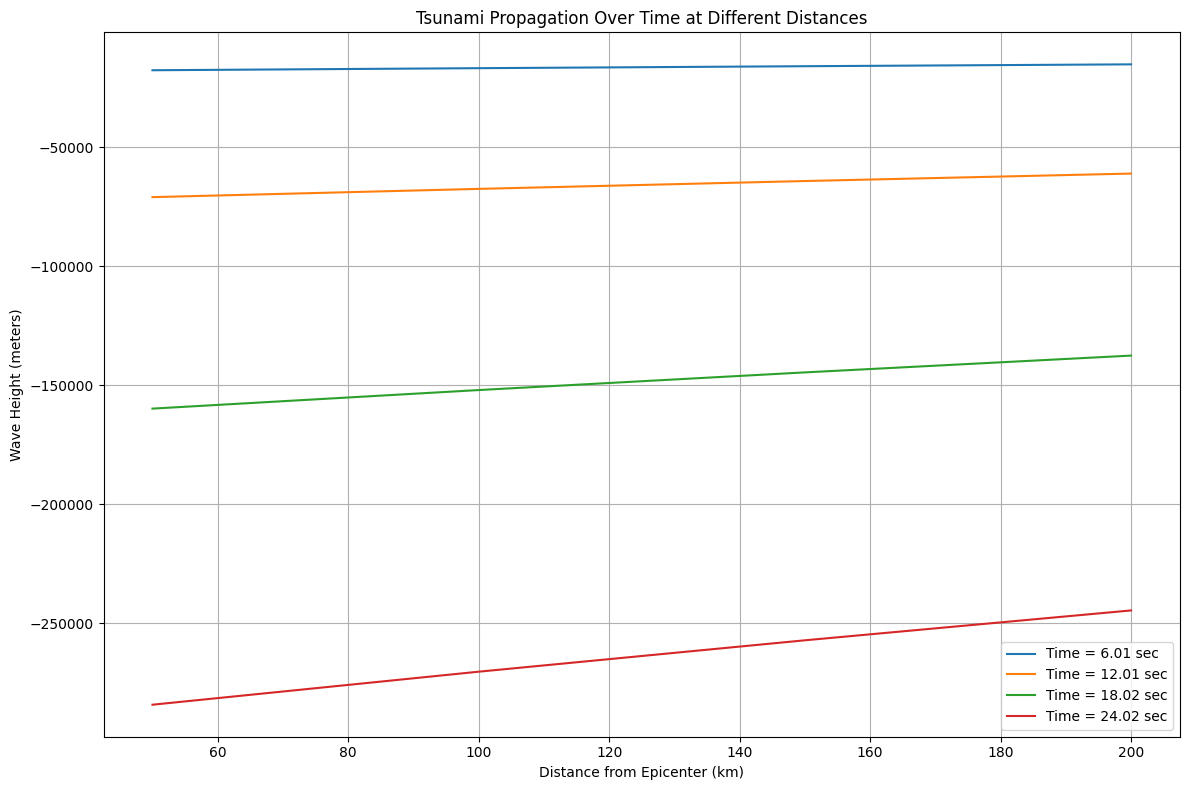

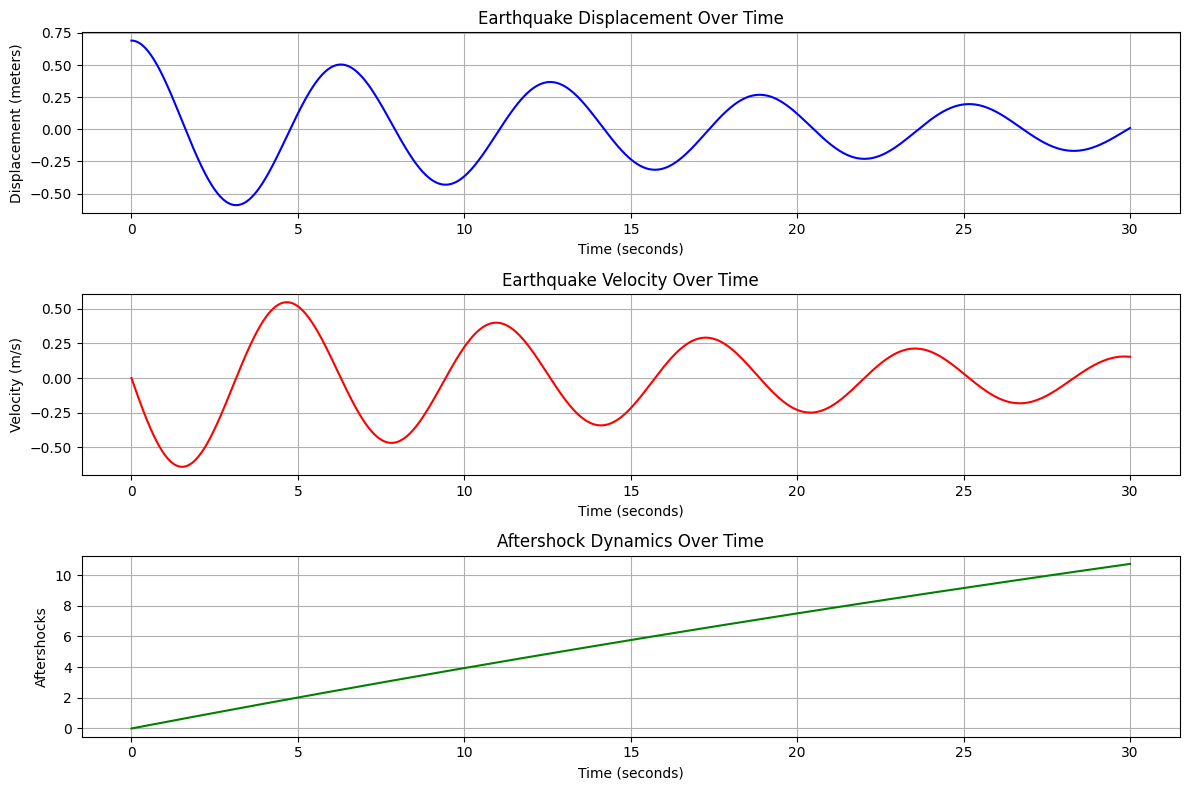

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Tsunami Model - Simulating tsunami propagation based on vertical displacement
def tsunami_model(y, t, earthquake_params):
    """
    Tsunami propagation model based on vertical seafloor displacement.
    """
    displacement = earthquake_params["displacement"]  # Seafloor displacement
    tsunami_speed = 1500  # Speed of tsunami waves in deep water (m/s)

    dydt = [y[1], -tsunami_speed * displacement]  # Simplified tsunami propagation model
    return dydt

# Earthquake Model based on Elastic Rebound Theory
def earthquake_model(y, t, magnitude, depth, location):
    """
    Simple ODE model for earthquake dynamics (Elastic Rebound Theory).
    """
    x, v = y  # Displacement and velocity

    gamma = 0.1  # Damping coefficient
    lambda_ = 1.0  # Restoring force constant

    dxdt = v
    dvdt = -gamma * v - lambda_ * x  # Damped harmonic oscillator equation

    return [dxdt, dvdt]

# Aftershock Model based on Omori's Law (exponential decay)
def aftershock_model(N, t, alpha, beta, S):
    """
    ODE model of aftershock decay.
    """
    dNdt = alpha * S - beta * N  # Omori's Law based model
    return dNdt

# Function to prompt the user for real earthquake data
def get_input():
    """
    Prompt the user for earthquake data including magnitude, depth, and location.
    """
    print("Please enter the following parameters for the earthquake simulation:")

    magnitude = float(input("Enter the magnitude of the earthquake (e.g., 6.9 for Taiwan earthquake): "))
    depth = float(input("Enter the depth of the earthquake (in km, e.g., 10 for Taiwan earthquake): "))
    location = (float(input("Enter latitude of the earthquake (e.g., 23.7 for Taiwan): ")),
                float(input("Enter longitude of the earthquake (e.g., 121.0 for Taiwan): ")))

    displacement = magnitude * 0.1  # Simple estimation based on magnitude
    alpha = float(input("Enter the aftershock rate constant (alpha, typical value is around 0.1): "))
    beta = float(input("Enter the aftershock decay constant (beta, typical value is around 0.01): "))

    time_span = float(input("Enter the time span for the simulation (e.g., 100 seconds): "))

    return magnitude, depth, location, displacement, alpha, beta, time_span

# Main simulation loop
def main():
    # Get user input for the parameters
    magnitude, depth, location, displacement, alpha, beta, time_span = get_input()

    # Initial conditions (displacement and velocity for earthquake and tsunami)
    y0_earthquake = [displacement, 0]  # Initial displacement and velocity

    # Time vector for simulation
    t = np.linspace(0, time_span, 1000)  # Time from 0 to the user-defined time span

    # Solve the earthquake model ODE for displacement and velocity
    solution = odeint(earthquake_model, y0_earthquake, t, args=(magnitude, depth, location))

    # Aftershock simulation
    S_initial = magnitude * 0.2
    aftershock_solution = odeint(aftershock_model, 0, t, args=(alpha, beta, S_initial))

    # Tsunami simulation: initial conditions for displacement and velocity in water
    tsunami_solution = odeint(tsunami_model, [displacement, 0], t, args=({"displacement": displacement, "depth": depth},))

    # Tsunami impact simulation on coastal regions (distances from epicenter)
    distances_from_epicenter = [50, 100, 150, 200]  # Example distances from the epicenter (in km)

    # Plot tsunami propagation at different times
    plt.figure(figsize=(12, 8))

    for time_point in [200, 400, 600, 800]:  # Choose time steps to visualize
        # Calculate the wave height at different distances from epicenter
        wave_heights = [tsunami_solution[time_point, 0] * np.exp(-d / 1000) for d in distances_from_epicenter]

        # Plot the wave heights at the current time point
        plt.plot(distances_from_epicenter, wave_heights, label=f'Time = {t[time_point]:.2f} sec')

    plt.xlabel('Distance from Epicenter (km)')
    plt.ylabel('Wave Height (meters)')
    plt.title('Tsunami Propagation Over Time at Different Distances')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot the earthquake displacement over time
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(t, solution[:, 0], label="Displacement (m)", color="blue")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Displacement (meters)")
    plt.title("Earthquake Displacement Over Time")
    plt.grid(True)

    # Plot the earthquake velocity over time
    plt.subplot(3, 1, 2)
    plt.plot(t, solution[:, 1], label="Velocity (m/s)", color="red")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Velocity (m/s)")
    plt.title("Earthquake Velocity Over Time")
    plt.grid(True)

    # Plot the aftershock dynamics over time
    plt.subplot(3, 1, 3)
    plt.plot(t, aftershock_solution, label="Aftershocks", color="green")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Aftershocks")
    plt.title("Aftershock Dynamics Over Time")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run the simulation
main()


# Gemini API: Prompting Quickstart

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb"><img src="https://github.com/google-gemini/cookbook/blob/main/images/colab_logo_32px.png?raw=1" />Run in Google Colab</a>
  </td>
</table>

This notebook contains examples of how to write and run your first prompts with the Gemini API.

In [ ]:
!pip install -U -q "google-generativeai>=0.7.2" # Install the Python SDK

In [ ]:
import google.generativeai as genai

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Run your first prompt

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content("Give me python code to sort a list")
print(response.text)

```python
# Using the built-in sort() method
my_list = [5, 2, 8, 1, 9]
my_list.sort()
print(my_list)  # Output: [1, 2, 5, 8, 9]

# Using the sorted() function (returns a new sorted list)
my_list = [5, 2, 8, 1, 9]
sorted_list = sorted(my_list)
print(sorted_list)  # Output: [1, 2, 5, 8, 9]
print(my_list)  # Output: [5, 2, 8, 1, 9] (original list remains unchanged)

# Sorting in descending order
my_list = [5, 2, 8, 1, 9]
my_list.sort(reverse=True)
print(my_list)  # Output: [9, 8, 5, 2, 1]

# Sorting a list of tuples based on the second element
my_list = [(1, 5), (3, 2), (2, 8)]
my_list.sort(key=lambda x: x[1])
print(my_list)  # Output: [(3, 2), (1, 5), (2, 8)]
```

**Explanation:**

* **`my_list.sort()`:** This method sorts the list in place (modifies the original list).
* **`sorted(my_list)`:** This function returns a new sorted list without modifying the original list.
* **`reverse=True`:**  This argument to the `sort()` method sorts the list in descending order.
* **`key=lambda x: x[1]

You can see the chat history: